<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: \<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E)  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])


<class 'ValueError'>: Couldn't find a pure Python 3 wheel for 'widgetsnbextension~=4.0'. You can use `micropip.install(..., keep_going=True)` to get a list of all packages with missing wheels.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 


/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


This function will download the dataset into your browser


In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

<b>Importing the Data</b>


you will need to download the dataset; if you are running locally, please comment out the following


In [4]:
path = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv'

In [5]:
await download(path, "drinks.csv")
path="drinks.csv"

Load the csv:


In [6]:
df= pd.read_csv(path)


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [7]:
df.head(12)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [8]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [9]:
grouped = df[['wine_servings', 'country']]
grouped = grouped.groupby(['country'], as_index= False).mean()
print(grouped)

         country  wine_servings
0    Afghanistan            0.0
1        Albania           54.0
2        Algeria           14.0
3        Andorra          312.0
4         Angola           45.0
..           ...            ...
188    Venezuela            3.0
189      Vietnam            1.0
190        Yemen            0.0
191       Zambia            4.0
192     Zimbabwe            4.0

[193 rows x 2 columns]


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [10]:
df['beer_servings'].describe(include = 'all')

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


<AxesSubplot:xlabel='country', ylabel='beer_servings'>

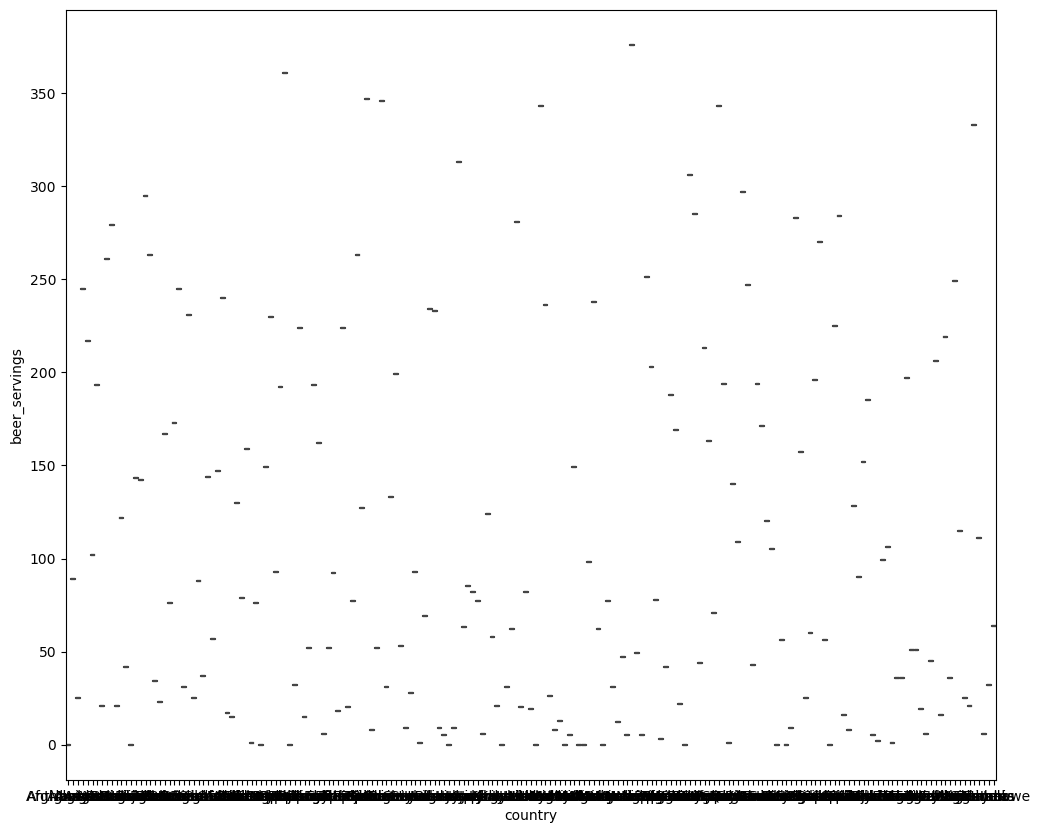

In [11]:
import seaborn as sns 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.boxplot(x="country", y="beer_servings", data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


<AxesSubplot:xlabel='wine_servings', ylabel='beer_servings'>

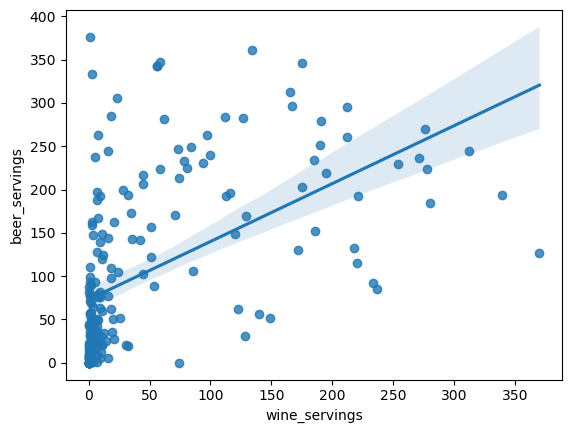

In [12]:
df[['wine_servings', 'beer_servings']].corr()
sns.regplot(x="wine_servings", y="beer_servings", data=df)


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['wine_servings']], df['total_litres_of_pure_alcohol'])
lr.score(df[['wine_servings']], df['total_litres_of_pure_alcohol'])

0.44568754597876037

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [30]:
y_data = df['total_litres_of_pure_alcohol']
x_data = df[['country', 'beer_servings', 'spirit_servings', 'wine_servings']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 0 )
lre = LinearRegression()
lre.fit(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
a = lre.score(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
b = lre.score(x_test[['beer_servings', 'wine_servings', 'spirit_servings']], y_test)
print(f"Data Train {a}")
print(f"Data Test {b}")

Data Train 0.8843621858666174
Data Test 0.6990304512837944


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
myInput = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(myInput)
pipe.fit(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
pipe.score(x_test[['beer_servings', 'wine_servings', 'spirit_servings']], y_test)

0.7076376133886035

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [39]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
RidgeModel.score(x_test[['beer_servings', 'wine_servings', 'spirit_servings']], y_test)

0.6990304549019178

<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [53]:
#Using Polynomial Features and Ridge Regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
x_test_pr = pr.fit_transform(x_test[['beer_servings', 'wine_servings', 'spirit_servings']], y_test)
RidgeModel1 = Ridge(alpha=0.1)
RidgeModel1.fit(x_train_pr, y_train)
a = RidgeModel1.score(x_test_pr, y_test)

#Using Pipeline
myInput1 = [('polynomial', PolynomialFeatures(degree=2)), ('model', Ridge(alpha=0.1))]
pipe1 = Pipeline(myInput1)
pipe1.fit(x_train[['beer_servings', 'wine_servings', 'spirit_servings']], y_train)
b = pipe1.score(x_test[['beer_servings', 'wine_servings', 'spirit_servings']], y_test)
print(f"Ridge Model Score {a}")
print(f"Pipeline Score    {b}")

Ridge Model Score 0.7076376228095795
Pipeline Score    0.7076376228095795


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


\<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E) Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset \<a href=[https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here)</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
